   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0 head
Y output predicted for given test samples 
: [ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]
Mean Squared Error:  21026037.329511296
root mean squared error:  4585.4157204675885
calculating MSE using numpy to verify 21026037.329511296


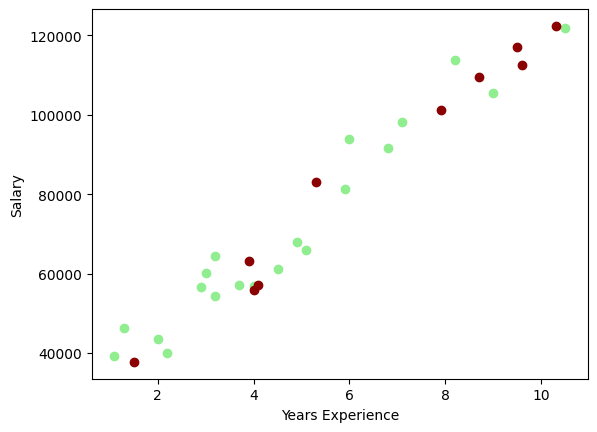

In [50]:
import numpy as np
import pandas as pd 
import warnings
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df_sd = pd.read_csv("Salary_Data.csv")
print(df_sd.head(),'head')

Xsd = df_sd.iloc[:, :-1].values
Ysd = df_sd.iloc[:, -1].values

#split train and test
# to leave 1/3rd for test data set I am giving 0.333 as test size
X_train, X_test, Y_train, Y_test = train_test_split(Xsd, Ysd, test_size = 0.333, random_state = 0)

# Linear Regression

from sklearn.linear_model import LinearRegression
sd_regressor = LinearRegression()
sd_regressor.fit(X_train, Y_train)

# Predicting the Test set result ￼
Ysd_Pred = sd_regressor.predict(X_test)
print("Y output predicted for given test samples \n:",Ysd_Pred)

# Mean square error
from sklearn.metrics import mean_squared_error
mean_sq_error = mean_squared_error(Y_test , Ysd_Pred)
root_mean_sq_error = np.sqrt(mean_sq_error)
print("Mean Squared Error: ", mean_sq_error)
print("root mean squared error: ", root_mean_sq_error)

#MSE using numpy
MSE = np.square(np.subtract(Y_test,Ysd_Pred)).mean()
print('calculating MSE using numpy to verify', MSE)

# scatter plot for training salary data and testing data showing both in one plot using different colors
plt.scatter(X_train,Y_train , color = "lightgreen")
plt.xlabel('Years Experience')
plt.ylabel('Salary')
# plt.show()

# test data set
plt.scatter(X_test,Y_test , color = "darkred")
plt.show()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

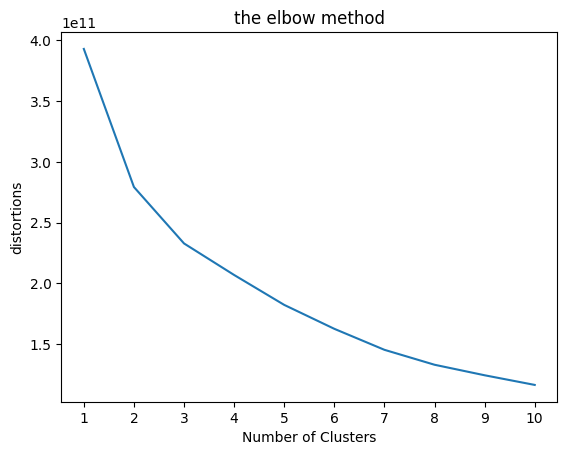

Silhouette score:  0.46594126305182004
x scaled:  [[-0.73198937 -0.24943448 -0.42489974 ... -0.31096755 -0.52555097
   0.36067954]
 [ 0.78696085  0.13432467 -0.46955188 ...  0.08931021  0.2342269
   0.36067954]
 [ 0.44713513  0.51808382 -0.10766823 ... -0.10166318 -0.52555097
   0.36067954]
 ...
 [-0.7403981  -0.18547673 -0.40196519 ... -0.33546549  0.32919999
  -4.12276757]
 [-0.74517423 -0.18547673 -0.46955188 ... -0.34690648  0.32919999
  -4.12276757]
 [-0.57257511 -0.88903307  0.04214581 ... -0.33294642 -0.52555097
  -4.12276757]]
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.731989          -0.249434  -0.424900         -0.356934   
1     0.786961           0.134325  -0.469552         -0.356934   
2     0.447135           0.518084  -0.107668          0.108889   
3     0.049099          -1.016953   0.232058          0.546189   
4    -0.358775           0.518084  -0.462063         -0.347294   
...        ...                ...        ...               ... 

In [52]:
import numpy as np
import pandas as pd 
import warnings
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df_cd = pd.read_csv("K-Mean_Dataset.csv")
# print(customer_data.head(),'head')

print(df_cd.info(),'checking info')
#replacing null values
cd_null_values = df_cd.isnull().sum()
print("Null values in customer dataset: ", cd_null_values)
# so now the null values are present in "CREDIT_LIMIT" , "MINIMUM_PAYMENTS" columns
df_cd["CREDIT_LIMIT"].fillna(df_cd["CREDIT_LIMIT"].mean(),inplace=True)
df_cd["MINIMUM_PAYMENTS"].fillna(df_cd["MINIMUM_PAYMENTS"].mean(),inplace=True)

# checking again to make sure
cd_null_values = df_cd.isnull().sum()
print("Null values in customer dataset: ", cd_null_values)

# customer_data.drop("CUST_ID",axis=1,inplace=True)

X = df_cd.iloc[:,1:]
Y = df_cd.iloc[:, -1]

# print("X values: \n", X)
# print("Y values: \n", Y)

# ##elbow method
from sklearn.cluster import KMeans

distortions = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.plot(range(1,11),distortions)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(1,11,1))
plt.ylabel('distortions')
plt.show()

# So from graph, the elbow deviation is at n = 3
df_cd_km = KMeans(n_clusters=3)
df_cd_km.fit(X)
y_cluster_kmeans = df_cd_km.predict(X)
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
print("Silhouette score: ", score)

# feature scaling
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)
print("x scaled: ", X_scaled_array)
print(X_scaled , 'dataset')

df_cd_kmeans = KMeans(n_clusters=3)
df_cd_kmeans.fit(X_scaled)
ycd_cluster_kmeans = df_cd_kmeans.predict(X_scaled)
from sklearn import metrics
result = metrics.silhouette_score(X_scaled, ycd_cluster_kmeans)
print("After scaling score : ",result)

# Generally, silhouette score values ranges from -1 to +1, which indicates number of clusters which are nearer 
# to +1 will do clear classification of data, but here in this case since the data from original contains the 
# values from different units and ranging from 0 to nearly 1 lakh in some columns, normally we will do feature scaling 
# as it would converge all the datapoints to a uniform range of values.
# Here before doing feature scaling the silhouette score is 0.4659, and after performing the feature scaling the score is 0.2505,
# usually the score needs to be improved, but since the dataset consists of lot of features, we need to do more pre processing, 
# for now we had only removed null values, may be we need to do more data preprocessing to achieve good score